In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ages = pd.read_csv("householdsize.csv")

swapped = pd.DataFrame.transpose(ages)

swapped.columns = swapped.iloc[0]
swapped = swapped[1:]
swapped.head()

Number of People,1 Person,2 Persons,3 Persons,4 Persons,5 or more Persons
Denman,240,315,70,40,25
Hornby,285,260,55,45,15
CV,9370,13380,4210,3315,1660
BC,600705,719865,296200,256700,168355
Canada,4396015,5124800,2194825,2002455,1260850


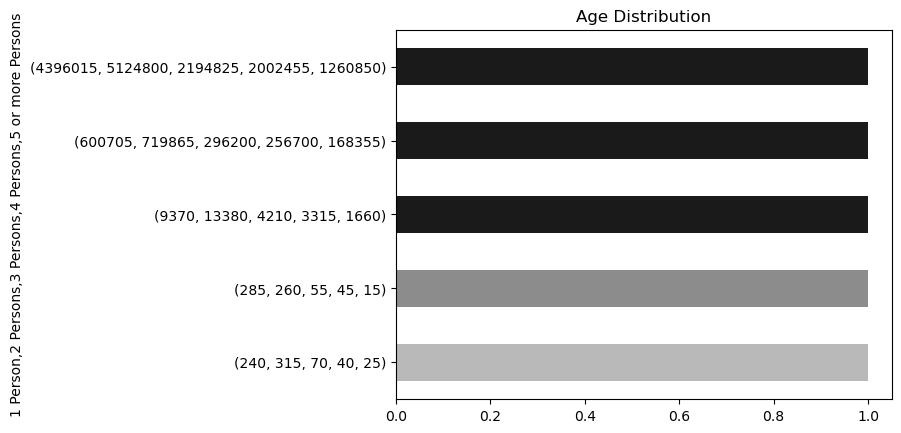

In [12]:
group_swapped = swapped.groupby(
    "1 Person").value_counts(normalize=True)
group_swapped.plot.barh(stacked="True", title="Age Distribution", color=[(0.1, 0.1, 0.1, 0.3), (
    0.1, 0.1, 0.1, 0.5), (0.1, 0.1, 0.1, 1), (0.1, 0.1, 0.1, 1),  (0.1, 0.1, 0.1, 1)], legend=False)
groups = list(ages.columns[1:].values)
# color = {"Denman": "blue", "Hornby": "purple",
# "CV": "orange", "BC": "yellow", "Canada": "green"}
# groups

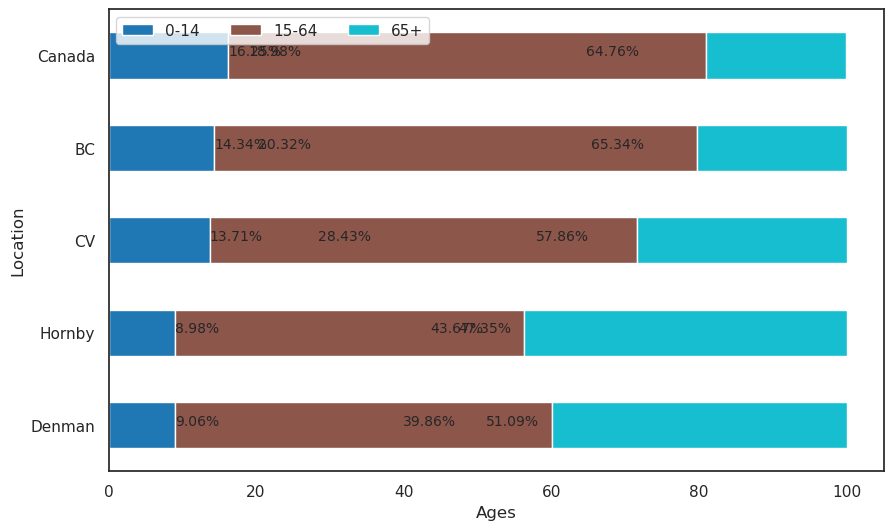

In [ ]:
""" #swapped.plot(kind="barh", stacked="True", colormap="tab10", figsize=(10, 6))
plt.legend(loc="upper left", ncol=5)
plt.xlabel("Ages")
plt.ylabel("Location")

for n, x in enumerate([*swapped.index.values]):
    for prop in swapped.loc[x]:
        plt.text(x=prop, y=n, s=f"{prop}%", fontsize=10)

plt.show() """

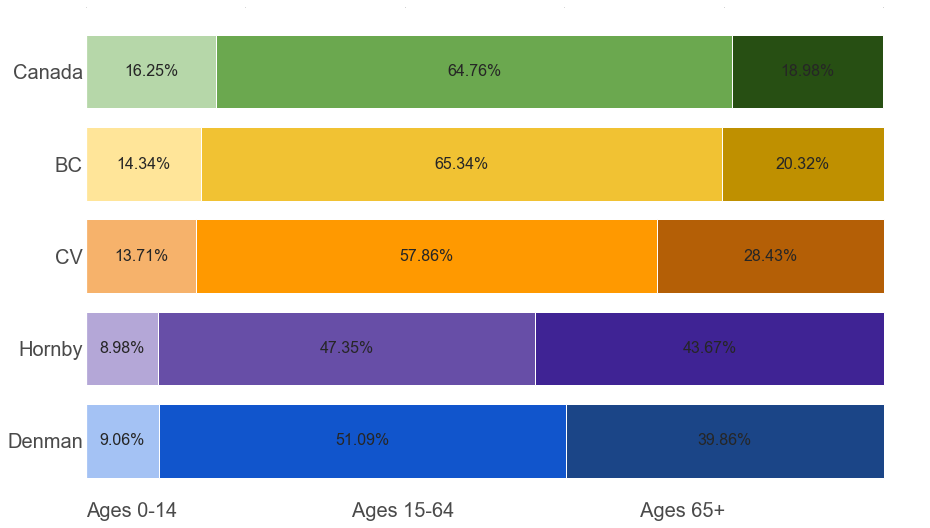

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# set the figure and axis subplots
fig, ax = plt.subplots(figsize=(15, 9))

# set style to white, no grid
sns.set(style="white")

# set ticks to top
ax.xaxis.tick_top()

# remove x axis ticks
ax.tick_params(axis='x', which=u'both', length=0, labelsize=0, labeltop=True, colors="#4A4A4A")

# remove y axis ticks
ax.tick_params(axis='y', which=u'both', length=0, labelsize=20,labeltop=True, colors="#4A4A4A")


# Ages labels
age_labels = "Ages 0-14                                Ages 15-64                                  Ages 65+"
ax.set_xlabel(age_labels, labelpad=1, loc='left', fontsize=20, color="#4A4A4A", y=.97)


# Remove spines (plot outlines)
plt.setp(ax.spines.values(), color=None)

# Read in data and transpose it so it will graph well
df_ages = pd.read_csv("ages.csv", index_col=0).mul(100).round(2).T

# set color palette
palette = {'Ages 65+': ["#1B4587", "#3F2394", "#B45F06", "#BF9000", "#274F13"],
           'Ages 15-64': ["#1155CC", "#674EA7", "#FF9900", "#F1C233", "#6BA84F"],
           'Ages 0-14': ["#A4C2F4", "#B4A7D7", "#F6B26B", "#FFE599", "#B6D7A9"]}


# plot data in stacked bar graph
df_ages.plot(kind='barh', ax=ax, stacked=True, color=palette,
             width=.8, legend=False)  # width is bar width relative to plot

# Use y-axis label for ages
for section in ax.containers:
    labels = [value.get_height() if value.get_height()  # height of the square that makes a container
              else "" for value in section]  # section is each piece of the bar
    
    # fontcolor option there too, can get hue values of colors to decide the font color
    ax.bar_label(section, fmt="%0.2f%%", label_type="center", fontsize=16)

Ages    Ages 0-14  Ages 15-44  Ages 45-64  Ages 65+
Denman       9.06       40.56       15.43     34.86
Hornby       8.98       25.35       22.35     43.67
CV          13.71       24.22       33.64     28.43
BC          14.34       42.00       23.34     20.32
Canada      16.25       42.22       22.54     18.98


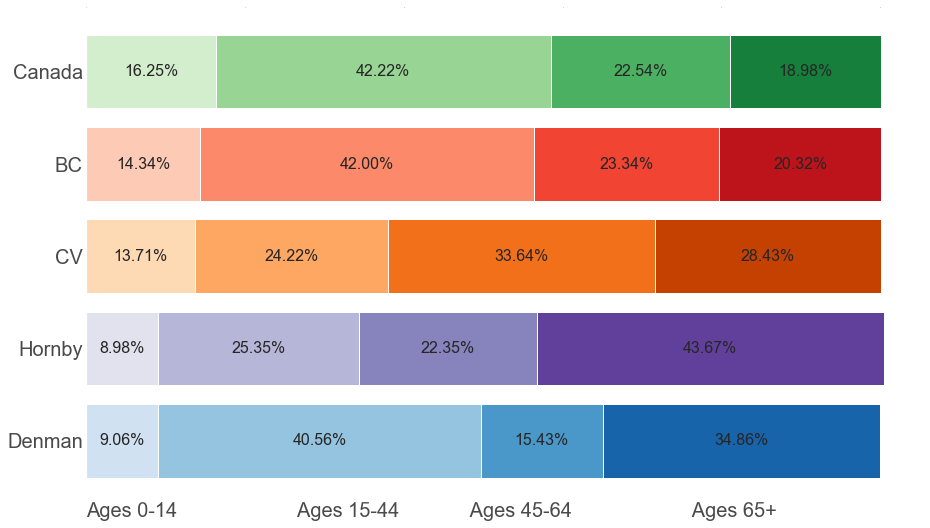

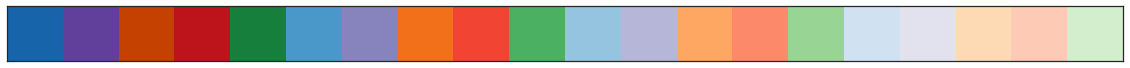

In [79]:
# Option 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# read in the CSV and Transpose it (flp rows and columns)
# otherwise, the data plots strange.  
df = pd.read_csv("ages_BG.csv", index_col=0).mul(100).round(2).T
print(df)

# set plot style: white, no gridlines
sns.set(style="white")

# set the figure and axis subplots
fig, ax = plt.subplots(figsize=(15, 9))
ax.xaxis.tick_top()
# Ages labels
age_labels = "Ages 0-14                      Ages 15-44             Ages 45-64                      Ages 65+"
# plt.title(age_labels, fontsize=20, color="#4A4A4A", y=.97)
ax.set_xlabel(age_labels, labelpad=1, loc='left', fontsize=20, color="#4A4A4A", y=.97)
# plt.xlabel(age_labels, fontsize=14)
ax.tick_params(axis='x', which=u'both', length=0,
               labelsize=0, labeltop=True, colors="#4A4A4A")
# Location labels
ax.tick_params(axis='y', which=u'both', length=0, labelsize=20,
               labeltop=True, colors="#4A4A4A")
plt.setp(ax.spines.values(), color=None)

# Define color palette per region
denman = sns.color_palette("Blues", 4).as_hex()
hornby = sns.color_palette("Purples", 4).as_hex()
cv = sns.color_palette("Oranges", 4).as_hex()
bc = sns.color_palette("Reds", 4).as_hex()
canada = sns.color_palette("Greens", 4).as_hex()

# Transpose/stack colors in the combined regions to create shaded palette
regions_transposed = [item for item in zip(canada, bc, cv, hornby, denman)]
regions = [element for item in regions_transposed for element in item][::-1]
sns.palplot(regions)


palette_r = {'Ages 65+':regions[0:5],
             'Ages 45-64':regions[5:10],
             'Ages 15-44': regions[10:15],
             'Ages 0-14':regions[15:]}


# plot data
# Rotation is the labels, 0 is horizontal, 90 is vertical
df.plot(kind='barh', ax=ax, stacked=True, color=palette_r, width=.8, rot=0, legend=False)

# Iterate through and calculate labels for subsections
for section in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [value.get_height() if value.get_height()
              else '' for value in section]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(section, fmt='%0.2f%%', label_type='center', fontsize=16)